In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='omniglot_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

Files already downloaded and verified


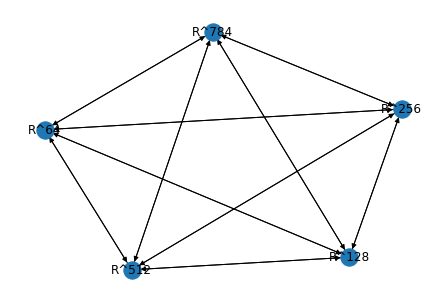

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
optimizer = config.init_obj('optimizer', pyro.optim)

In [11]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader)

In [12]:
trainer.train()

Train Epoch: 1 [0/17352 (0%)] Loss: 13781.714844
Train Epoch: 1 [80/17352 (0%)] Loss: 12762.446289
Train Epoch: 1 [160/17352 (1%)] Loss: 27909.349609
Train Epoch: 1 [240/17352 (1%)] Loss: -23961.429688
Train Epoch: 1 [320/17352 (2%)] Loss: -39275.539062
Train Epoch: 1 [400/17352 (2%)] Loss: -26783.416016
Train Epoch: 1 [480/17352 (3%)] Loss: -64708.046875
Train Epoch: 1 [560/17352 (3%)] Loss: -81343.093750
Train Epoch: 1 [640/17352 (4%)] Loss: -78394.484375
Train Epoch: 1 [720/17352 (4%)] Loss: -99848.968750
Train Epoch: 1 [800/17352 (5%)] Loss: -117845.851562
Train Epoch: 1 [880/17352 (5%)] Loss: -135559.562500
Train Epoch: 1 [960/17352 (6%)] Loss: -158445.062500
Train Epoch: 1 [1040/17352 (6%)] Loss: -185472.937500
Train Epoch: 1 [1120/17352 (6%)] Loss: -210357.453125
Train Epoch: 1 [1200/17352 (7%)] Loss: -188108.625000
Train Epoch: 1 [1280/17352 (7%)] Loss: -212471.453125
Train Epoch: 1 [1360/17352 (8%)] Loss: -200050.031250
Train Epoch: 1 [1440/17352 (8%)] Loss: -195483.750000
Tra